In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Number of words to consider as features
vocab_size = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences with max length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 32, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid output for binary classification

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5335 - loss: 0.6847 - val_accuracy: 0.7600 - val_loss: 0.5142
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8450 - loss: 0.3982 - val_accuracy: 0.8102 - val_loss: 0.4461
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9059 - loss: 0.2404 - val_accuracy: 0.8668 - val_loss: 0.3169
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9541 - loss: 0.1430 - val_accuracy: 0.8690 - val_loss: 0.3063
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9748 - loss: 0.0903 - val_accuracy: 0.8662 - val_loss: 0.3235
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9930 - loss: 0.0475 - val_accuracy: 0.8702 - val_loss: 0.3363
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9976 - loss: 0.0272 - val_accuracy: 0.8690 - val_loss: 0.3549
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9991 - loss: 0.0160 - val_accuracy: 0.8684 - v

In [5]:
results = model.evaluate(test_data, test_labels)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.8623 - loss: 0.4152
Test Loss: 0.4208759367465973, Test Accuracy: 0.8629599809646606


In [9]:
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         512,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,496,199 (9.52 MB)

 Trainable params: 832,067 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,664,132 (6.35 MB)

In [10]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [12]:
# Predicting the probabilities
probabilities = model.predict(test_data)
predictions = (probabilities > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
# Generating the classification report which includes precision, recall, and F1-score
print(classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))

# Computing the accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00     12500
    Positive       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.75      0.50      0.33     25000
weighted avg       0.75      0.50      0.33     25000

Accuracy: 0.5002
Confusion Matrix:
[[    6 12494]
 [    0 12500]]


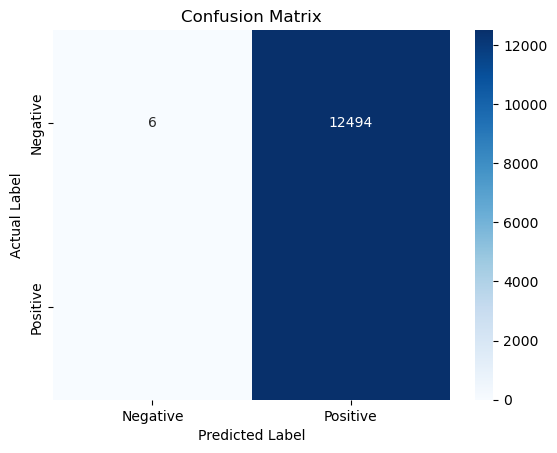

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
pip install matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score


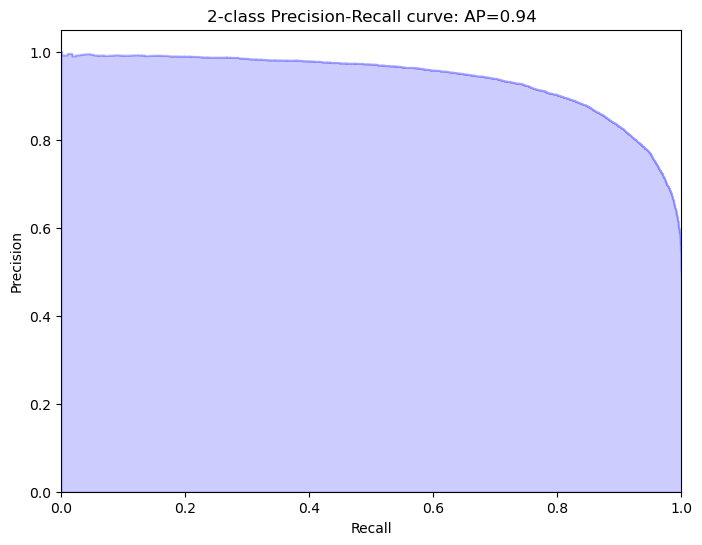

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(test_labels, probabilities.ravel())
average_precision = average_precision_score(test_labels, probabilities.ravel())

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()


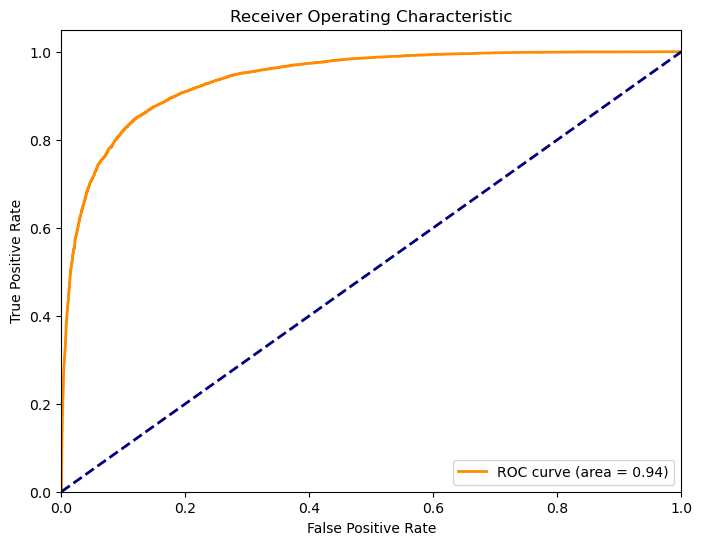

In [20]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_labels, probabilities.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
